In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
#load data
df = pd.read_csv('data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [18]:
df_churn.shape

(7043, 21)

In [19]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2132,6082-OQFBA,Male,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,436.9,No
6050,0487-RPVUM,Male,0,Yes,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),99.40,5943.65,No
6918,8267-ZNYVZ,Female,0,Yes,No,33,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,103.75,3361.05,Yes
5800,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
1419,3498-LZGQZ,Male,0,Yes,Yes,63,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.15,1177.05,No
1349,2625-TRCZQ,Female,0,Yes,No,51,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,49.65,2553.35,No
4055,4676-WLUHT,Male,0,No,No,54,No,No phone service,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),46.20,2431.95,No
4152,2649-HWLYB,Male,0,Yes,No,65,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),76.15,4929.55,No
5254,4393-GEADV,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),114.75,7842.3,No
1200,5370-IIVVL,Male,0,No,No,37,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.50,3778,No


In [21]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [23]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

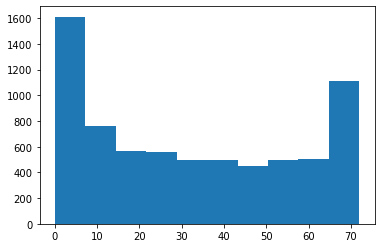

In [24]:
# show the distribution of tenure.
plt.hist(data = df, x = 'tenure');

In [25]:
df[df.customerID.duplicated()].shape[0]

0

In [26]:
df.query('PhoneService == "No"').shape

(682, 21)

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
# no missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df[df.duplicated()].shape[0]

0

In [30]:
df_copy = df.copy()

In [31]:
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)

In [32]:
df_copy.TotalCharges.dtype

dtype('float64')

In [33]:
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

In [34]:
df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape

(0, 21)

In [35]:
# store the clean data
df_copy.reset_index(drop=True)
df_copy.to_csv('Telco-Customer-Churn_clean.csv')

In [36]:
#load data
clean_df = pd.read_csv('Telco-Customer-Churn_clean.csv')